In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
# read dataset
dataset = pd.read_csv("train_AV3.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# shape of dataset
dataset.shape

(614, 13)

In [5]:
# last 10 elements of the dataset
dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# basic description of the dataset
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# checking null and missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

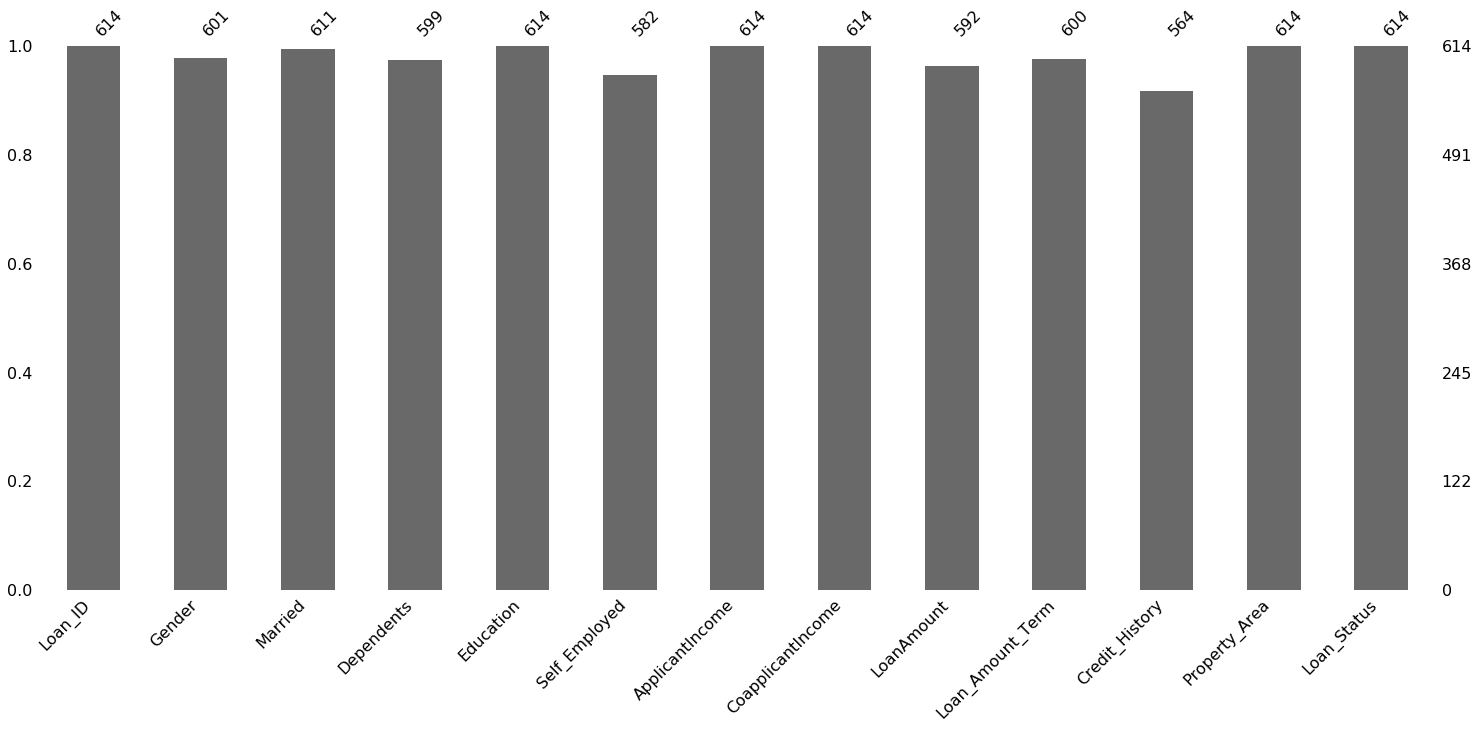

In [8]:
# plotting bar graph with null and missing values 
msno.bar(dataset)

In [9]:
# coloumns with error values
columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
          'Loan_Amount_Term', 'Credit_History']
for i in columns:
    print(i)
    print(dataset[i].value_counts())

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [10]:
# treating the msising and null non-numeric values
for i in ['Gender','Married','Dependents','Self_Employed']:
    dataset[i] = dataset[i].fillna(method='ffill')


In [11]:
# treating the missing and null numerical values 
dataset.interpolate(method ='linear', inplace=True, limit_direction ='both')

In [12]:
# checking null values after treating null values and missing values
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
dataset.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


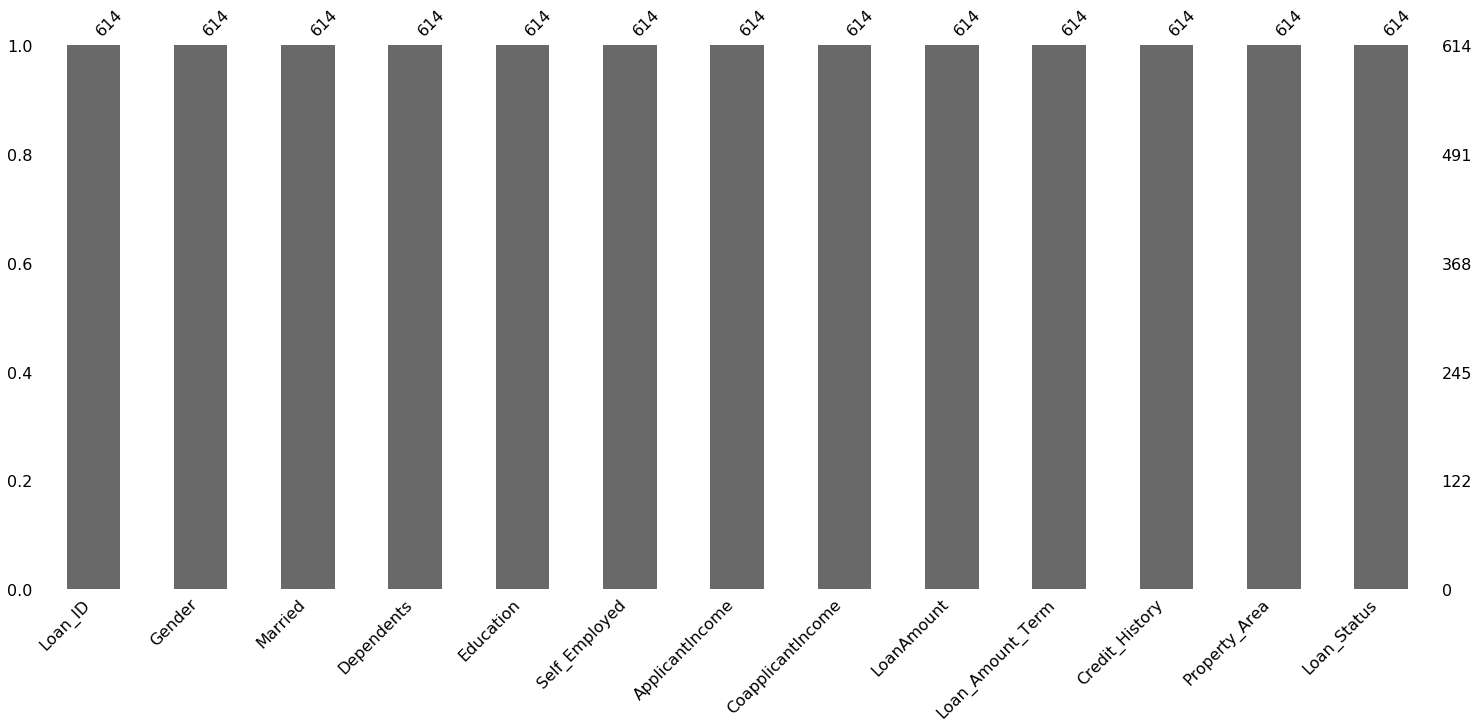

In [14]:
# bar graph after clearning missing and null values
msno.bar(dataset)

In [15]:
dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,334.5,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


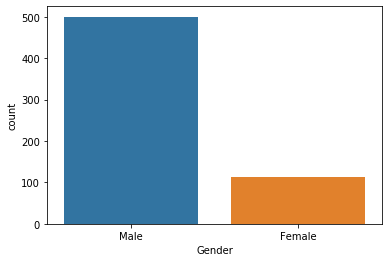

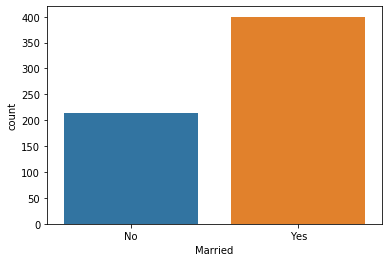

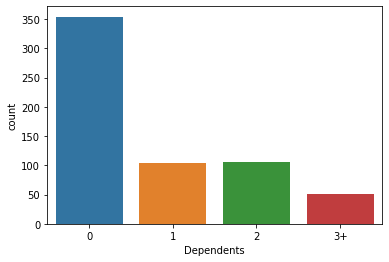

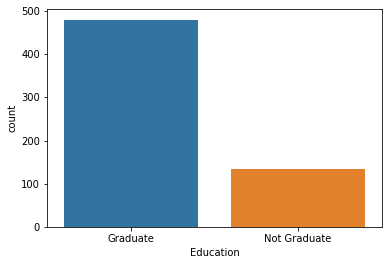

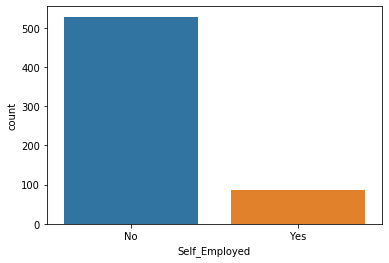

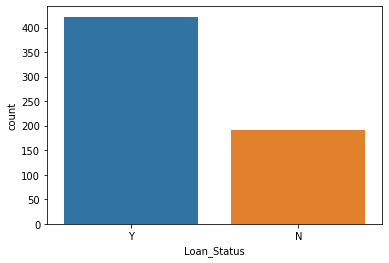

In [16]:
# count plot for categorical variables
categorical = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Status']
for i in categorical:
  sns.countplot(data=dataset,x=i)
  plt.show()

In [17]:
# changing catgorical values into numerical values
dataset['Gender'].replace({'Male':1,'Female':0},inplace=True)
dataset['Married'].replace({"Yes":1,'No':0},inplace=True)
dataset['Education'].replace({"Graduate":1,'Not Graduate':0},inplace=True)
dataset['Self_Employed'].replace({"Yes":1,'No':0},inplace=True)
dataset['Property_Area'].replace({"Urban":2,'Rural':1,'Semiurban':0},inplace=True)
dataset['Loan_Status'].replace({"Y":1,'N':0},inplace=True)
dataset['Dependents'].replace({'3+':4},inplace=True)

In [18]:
# Independent variables
x = dataset.drop(['Loan_ID','Loan_Status'],axis=1)
# Dependent variable
y = dataset['Loan_Status']

In [19]:
# logistic regression

In [20]:
# model to train
model = LogisticRegression(solver='liblinear', random_state=0)

In [21]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [23]:
model.classes_

array([0, 1], dtype=int64)

In [24]:
model.intercept_
model.coef_

array([[-1.36198740e-01,  3.38391228e-01,  1.45737840e-02,
         2.68187818e-01,  5.56295356e-02,  6.64731430e-06,
        -4.71209104e-05, -2.01511561e-03, -2.77192654e-03,
         2.63679256e+00, -3.41513577e-01]])

In [25]:
model.predict_proba(x)

array([[0.30612812, 0.69387188],
       [0.19258683, 0.80741317],
       [0.21110071, 0.78889929],
       ...,
       [0.28438219, 0.71561781],
       [0.25379811, 0.74620189],
       [0.72355098, 0.27644902]])

In [26]:
# model.predict(x)

In [27]:
# model score
model.score(x, y)

0.8078175895765473

In [28]:
# confusion matrix
confusion_matrix(y, model.predict(x))

array([[ 87, 105],
       [ 13, 409]], dtype=int64)

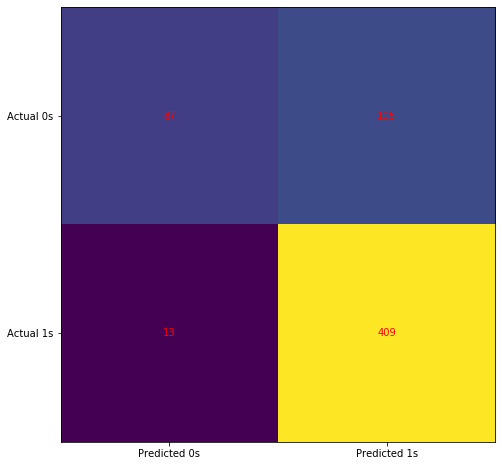

In [29]:
# heat map for the confusion matric
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
# classification report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.87      0.45      0.60       192
           1       0.80      0.97      0.87       422

    accuracy                           0.81       614
   macro avg       0.83      0.71      0.73       614
weighted avg       0.82      0.81      0.79       614



In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

label_encoder = LabelEncoder()
dataset['Loan_ID'] = label_encoder.fit_transform(dataset['Loan_ID'])
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Married'] = label_encoder.fit_transform(dataset['Married'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Self_Employed'] = label_encoder.fit_transform(dataset['Self_Employed'])
dataset['Property_Area'] = label_encoder.fit_transform(dataset['Property_Area'])
dataset['Loan_Status'] = label_encoder.fit_transform(dataset['Loan_Status'])


In [32]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
# feature engineering
from sklearn.feature_selection import chi2

In [34]:
# 1st array is chi-square values
# 2nd array is p-value
chi_scores = chi2(x,y)
chi_scores

(array([1.70048381e-02, 1.69785261e+00, 8.18985137e-02, 9.88390271e-01,
        4.30971931e-02, 9.39049635e+01, 1.13420416e+04, 5.45595086e+01,
        5.95084029e+00, 2.70416742e+01, 4.86665713e+00]),
 array([8.96247910e-01, 1.92569048e-01, 7.74740902e-01, 3.20136125e-01,
        8.35542370e-01, 3.31042936e-22, 0.00000000e+00, 1.50811178e-13,
        1.47102724e-02, 1.99115995e-07, 2.73804906e-02]))

In [35]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

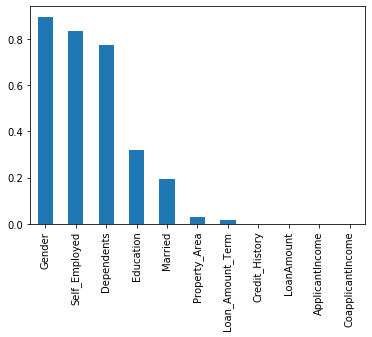

In [36]:
# larger p value represents the lower co-relation in the dataset
# so take the last few columns which has high correlation
p_values.plot.bar()

In [37]:
r=p_values.sort_values()
result=r.head(6)
result

CoapplicantIncome    0.000000e+00
ApplicantIncome      3.310429e-22
LoanAmount           1.508112e-13
Credit_History       1.991160e-07
Loan_Amount_Term     1.471027e-02
Property_Area        2.738049e-02
dtype: float64

In [38]:
# treaing outliers for the highly correlated features

In [39]:
# define a function for boxplotting
def box_plot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

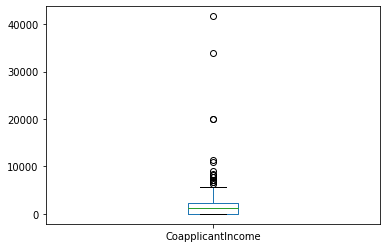

In [40]:
# for feature 1
box_plot(dataset,"CoapplicantIncome")

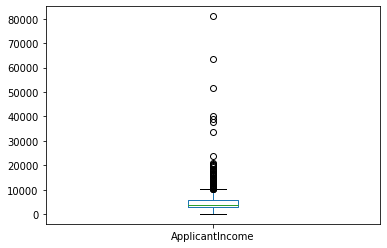

In [41]:
# for feature 2
box_plot(dataset,"ApplicantIncome")

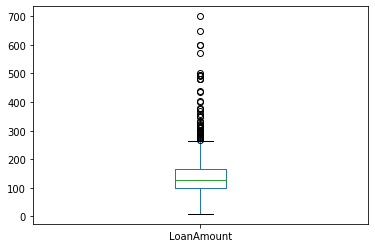

In [42]:
# for feature 3
box_plot(dataset,"LoanAmount")

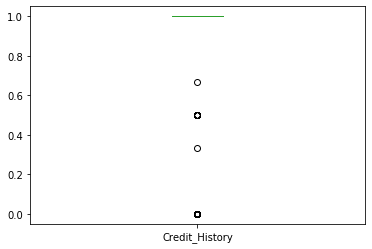

In [43]:
# for feature 4
box_plot(dataset,"Credit_History")

In [44]:
# remove outliers
def outlier(dt,ft):
    q1=dt[ft].quantile(0.25)
    q3=dt[ft].quantile(0.75)
    iqr=q3-q1
    
    low_lim=q1-0.5*iqr
    upp_lim=q3+0.5*iqr
    
    
    print (ft +"'s low and upp limit")
    print(low_lim,upp_lim)
    r=dt[(dt[ft] >low_lim) & (dt[ft] < upp_lim)]
    return r

In [45]:
# feature 1
dataset=outlier(dataset,"CoapplicantIncome")
#dataset.head(20)

# feature 2
dataset=outlier(dataset,"ApplicantIncome")

# feature 3
dataset=outlier(dataset,"LoanAmount")


CoapplicantIncome's low and upp limit
-1148.625 3445.875
ApplicantIncome's low and upp limit
1496.625 7105.125
LoanAmount's low and upp limit
74.0 162.0


In [46]:
# dataset after removing outlier
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
3,3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
6,6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,1,1,0,0,0,2894,2792.0,155.0,360.0,1.0,1,1
602,602,1,1,4,1,0,5703,0.0,128.0,360.0,1.0,2,1
607,607,1,1,2,0,0,3987,1411.0,157.0,360.0,1.0,1,1
608,608,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,1,1


In [47]:
x = dataset[["CoapplicantIncome","ApplicantIncome","LoanAmount","Credit_History"]]
y = dataset['Loan_Status']
x.tail(10)

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History
588,0.0,4750,94.0,1.0
589,0.0,2726,106.0,0.0
593,3300.0,3859,142.0,1.0
595,0.0,3833,110.0,1.0
597,0.0,2987,88.0,0.0
601,2792.0,2894,155.0,1.0
602,0.0,5703,128.0,1.0
607,1411.0,3987,157.0,1.0
608,1950.0,3232,108.0,1.0
613,0.0,4583,133.0,0.0


In [48]:
# Scaling method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit_transform(x)
x = pd.DataFrame(s,columns = x.columns)
x

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History
0,-1.024730,1.819948,0.416390,0.479525
1,0.371146,0.761987,0.416390,0.479525
2,1.157946,-0.909357,0.044960,0.479525
3,-1.024730,1.946134,1.019962,0.479525
4,0.378551,-1.118275,-1.115756,0.479525
...,...,...,...,...
327,1.559676,-0.649463,1.669964,0.479525
328,-1.024730,1.697940,0.416390,0.479525
329,0.281358,0.263926,1.762821,0.479525
330,0.780282,-0.367006,-0.512184,0.479525


In [49]:
# packages for ML algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score

In [50]:
# cross validation

cv=KFold(n_splits=5,shuffle=True)
s1=cross_val_score(DecisionTreeClassifier(),x,y)
s2=cross_val_score(LogisticRegression(),x,y)
s3=cross_val_score(SVC(),x,y)
s4=cross_val_score(KNeighborsClassifier(),x,y)


print(s1)
print(s2)
print(s3)
print(s4)

[0.74626866 0.71641791 0.81818182 0.78787879 0.87878788]
[0.85074627 0.76119403 0.8030303  0.84848485 0.87878788]
[0.85074627 0.76119403 0.81818182 0.87878788 0.89393939]
[0.82089552 0.74626866 0.84848485 0.84848485 0.89393939]


In [51]:
# hyperparameter tuning

params2={
    'penalty':['l1','l2'],
    'C':[1.0]
}

params3={
  'C':[0.001,0.01,1.0],
  'gamma':['auto','scale'],
  'class_weight':['balanced',None]
}

params4={
    'n_neighbors':[2,3,4,5,6,78,16],
    'p':[2,3]
}


h2=GridSearchCV(LogisticRegression(),param_grid=params2,cv=cv)
h3=GridSearchCV(SVC(),param_grid=params3,cv=cv)
h4=GridSearchCV(KNeighborsClassifier(),param_grid=params4,cv=cv)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

In [53]:
# Decision tree
y_pred = (DecisionTreeClassifier().fit(x_train,y_train)).predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7611940298507462


In [54]:
# Logistic Regression
model2=(h2.fit(x_train,y_train)).best_estimator_
y_pred=model2.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7910447761194029


In [55]:
# Logistic Regression
y_pred = (LogisticRegression().fit(x_train,y_train)).predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7910447761194029


In [56]:
# Support vector classifier
y_pred = (SVC().fit(x_train,y_train)).predict(x_test)
print(accuracy_score(y_pred,y_test))

0.835820895522388


In [57]:
# Support vector classifier
model3=(h3.fit(x_train,y_train)).best_estimator_
y_pred=model3.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.835820895522388


In [58]:
#Kth nearest neighbour
model4=(h4.fit(x_train,y_train)).best_estimator_
y_pred=model4.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8507462686567164


In [59]:
# Kth nearest neighbour
y_pred = (KNeighborsClassifier().fit(x_train,y_train)).predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8208955223880597


In [60]:
print("Thank You...!!")

Thank You...!!
